### ## BBM 409 - Programming Assignment 2

##  GAZİ KAĞAN SOYSAL 2210356050

**Task:**
We will analyze the results using logistic regression, svm and decision tree algorithms on the datasets we have.

# LOGISTIC REGRESSION

### 1. Data Loading and Exploration

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from IPython.display import display, HTML
from IPython.display import Markdown, display

In [2]:
# Download the Bank Marketing dataset
df_bankset = pd.read_csv("portuguese_bank_marketing_numeric_random_subsampled.csv", encoding="utf-8")
df_bankset

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,28,9.0,0,2.0,1,1055,1,1,1.0,28,1,196,1,-1,0,0.0,1
1,36,4.0,1,2.0,1,520,2,1,0.0,23,5,110,2,-1,0,0.0,1
2,38,2.0,0,3.0,1,1314,2,2,1.0,16,7,378,2,-1,0,0.0,1
3,41,9.0,1,3.0,1,28,2,1,1.0,4,2,358,2,-1,0,0.0,1
4,27,2.0,0,3.0,1,290,1,1,1.0,10,8,88,1,-1,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10573,73,5.0,1,2.0,1,2850,1,1,1.0,17,11,300,1,40,8,1.0,2
10574,25,2.0,0,2.0,1,505,1,2,1.0,17,11,386,2,-1,0,0.0,2
10575,51,2.0,1,3.0,1,825,1,1,1.0,17,11,977,3,-1,0,0.0,2
10576,71,5.0,2,1.0,1,1729,1,1,1.0,17,11,456,2,-1,0,0.0,2


- The dataset shows whether the clients will subscribe to the term deposit or not, depending on their features.

- y shows labels. There are 16 features as numeric.

- There are 10578 sample. We can say that we have big dataset.

In [3]:
display(Markdown(f"**{'SUMMARY STATISTICS'}**"))
df_bankset.describe()

**SUMMARY STATISTICS**

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
count,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000
mean,41.189355,4.188788,0.795330,2.104935,1.013991,1528.343354,1.472396,1.131688,0.862072,15.516638,6.188410,380.883059,2.493855,51.955663,0.860560,0.504160,1.500000
std,12.007143,2.825885,0.627736,0.791340,0.117460,3124.718140,0.499261,0.338168,0.508764,8.412610,2.565498,353.020396,2.649877,108.890295,3.534368,0.971481,0.500024
min,18.000000,0.000000,0.000000,0.000000,1.000000,-3058.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,1.000000
25%,32.000000,2.000000,0.000000,2.000000,1.000000,123.000000,1.000000,1.000000,1.000000,8.000000,5.000000,144.000000,1.000000,-1.000000,0.000000,0.000000,1.000000
50%,39.000000,4.000000,1.000000,2.000000,1.000000,554.000000,1.000000,1.000000,1.000000,15.000000,6.000000,259.000000,2.000000,-1.000000,0.000000,0.000000,1.500000
75%,49.000000,6.000000,1.000000,3.000000,1.000000,1707.750000,2.000000,1.000000,1.000000,21.000000,8.000000,515.000000,3.000000,43.750000,1.000000,1.000000,2.000000
max,95.000000,11.000000,2.000000,3.000000,2.000000,81204.000000,2.000000,2.000000,2.000000,31.000000,12.000000,4918.000000,63.000000,854.000000,275.000000,3.000000,2.000000


### Calculating correlation between target variable 'y' and other features

In [4]:
correlation_matrix = np.corrcoef(df_bankset, rowvar=False)

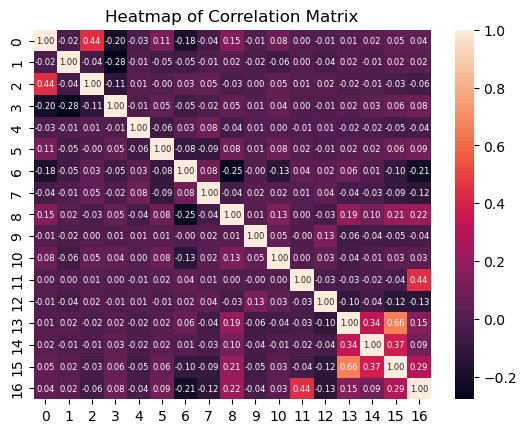

In [5]:
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", annot_kws={"size": 6})
plt.title('Heatmap of Correlation Matrix')
plt.show()

- We will choose 2 of the 16 features to visualize our models in 2 dimensions. The features that are most correlated with the label are more meaningful information to determine the target. Therefore, we will choose the 2 most correlated features. 

- When we look at the correlation matrix of dataset. The most correlated features with label are duration (0.44) and poutcome (0.29).

# 1.1 Implementing Logistic Regression with most correlated 2 features

In [6]:
# Choose the most correlated features on df and labels

X_most_corr = df_bankset[['duration', 'poutcome']]
y = df_bankset['y']

In [7]:
display(Markdown(f"**{'Features'}**"), X_most_corr)

**Features**

,duration,poutcome
0,196,0.0
1,110,0.0
2,378,0.0
3,358,0.0
4,88,0.0
...,...,...
10573,300,1.0
10574,386,0.0
10575,977,0.0
10576,456,0.0


In [8]:
display(Markdown(f"**{'Targets'}**"), y)

**Targets**

0        1
1        1
2        1
3        1
4        1
        ..
10573    2
10574    2
10575    2
10576    2
10577    2
Name: y, Length: 10578, dtype: int64

In [9]:
display(Markdown(f"**{'Summary Statistic of Selected Features'}**"), X_most_corr)

**Summary Statistic of Selected Features**

,duration,poutcome
0,196,0.0
1,110,0.0
2,378,0.0
3,358,0.0
4,88,0.0
...,...,...
10573,300,1.0
10574,386,0.0
10575,977,0.0
10576,456,0.0


In [10]:
# Convert the Dataframe to a Numpy array
X_most_corr = np.array(X_most_corr)
y = np.array(y)

# Change labels
y[y == 1] = 0
y[y == 2] = 1

- In order to perform matrix operations, we convert dataframes into arrays.
- To apply the formulas without confusion and to make them easier to understand, we change the positive classes from 2 to 1 and the negative classes from 1 to 0.

###  Define logistic regression model as class and necessary functions such as sigmoid, fit, predict

In [11]:
class LogisticRegression:
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        learning_rate = 0.01
        epoch = 50
        weights = np.zeros(X.shape[1])
        bias = 0
        
        for i in range(epoch):
            for sample_num, sample in enumerate(X):
                weighted_sum = np.dot(weights,sample) + bias
                probability = self.sigmoid(weighted_sum)
                weights = weights - (learning_rate * sample * (probability - y[sample_num]))
                bias = bias - (learning_rate * (probability - y[sample_num]))
                    
        return weights, bias
    
    def predict(self, X, y, weights, bias):
        predictions = []
        
        for sample_num,sample in enumerate(X):
            weighted_sum = np.dot(weights,sample) + bias
            probablity = self.sigmoid(weighted_sum)
            predicted_target = 1 if probablity >= 0.5 else 0
            predictions.append(predicted_target)

        return predictions         

Split the dataset into a training set and a validation set (80% training and 20% validation).

In [12]:
X_train_most_corr, X_test_most_corr, y_train_most_corr, y_test_most_corr = train_test_split(X_most_corr, y, test_size=0.2, random_state=82)

- In order to calculate the accuracy of the model we trained, we separate a portion of our data as test data.

Scale the features using StandardScaler

In [13]:
scaler = StandardScaler()
X_train_most_corr = scaler.fit_transform(X_train_most_corr)
X_test_most_corr = scaler.transform(X_test_most_corr)

* Initialize and train the custom logistic regression model

In [14]:
log_reg = LogisticRegression()
log_reg_model_most_corr = log_reg.fit(X_train_most_corr,y_train_most_corr)
weights_most_corr = log_reg_model_most_corr[0]
bias_most_corr = log_reg_model_most_corr[1]

* Make predictions on the validation set

In [15]:
predictions_most_corr = log_reg.predict(X_test_most_corr, y_test_most_corr, weights_most_corr, bias_most_corr)

### Evaluation of the model's performance, print classification report and confusion matrix

In [16]:
report_most_corr = classification_report(y_test_most_corr, predictions_most_corr, output_dict=True)
report_most_corr_df = pd.DataFrame(report_most_corr).transpose()
display(report_most_corr_df.style.background_gradient(cmap="Blues").set_caption("Classification Report"))

,precision,recall,f1-score,support
0,0.744318,0.845941,0.791883,1084.000000
1,0.811086,0.694767,0.748434,1032.000000
accuracy,0.772212,0.772212,0.772212,0.772212
macro avg,0.777702,0.770354,0.770158,2116.000000
weighted avg,0.776882,0.772212,0.770692,2116.000000


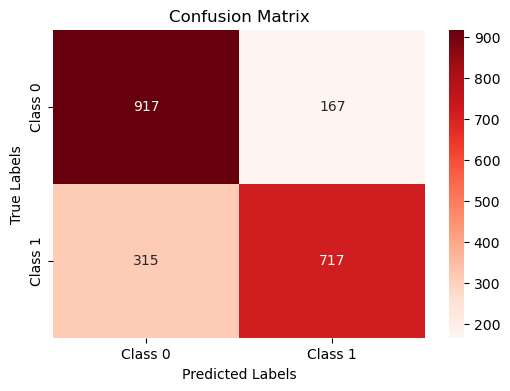

In [17]:
conf_matrix_most_corr = confusion_matrix(y_test_most_corr, predictions_most_corr)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_most_corr, fmt='d', annot=True, cmap='Reds', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

- We see that the classes are distributed evenly in the test data.
- Accuracy appears to be 77%. It's a good rate, but it could be higher.
- Class 1 recall is at 69%. This shows that the model is a bit lacking in predicting class 1.

### Plot decision boundary

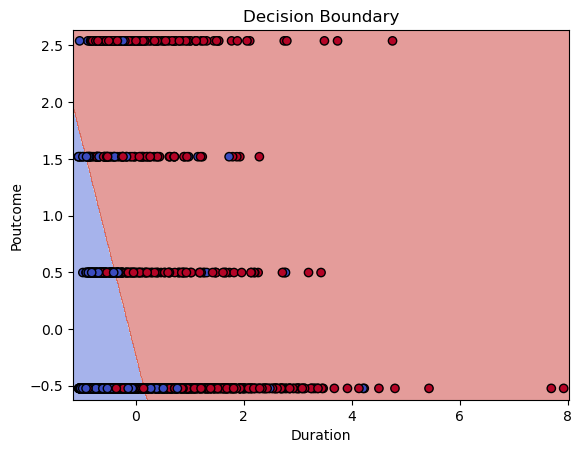

In [18]:
def plot_decision_boundary_of_log_reg(X, y, model, feature_name_1, feature_name_2):
    weights = model[0]
    bias = model[1]
    
    x_min = X[:, 0].min() - 0.1
    x_max = X[:, 0].max() + 0.1
    y_min = X[:, 1].min() - 0.1
    y_max = X[:, 1].max() + 0.1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),  np.arange(y_min, y_max, 0.01))

    Z = np.dot(np.c_[xx.ravel(), yy.ravel()], weights) + bias
    Z = np.where(Z >= 0, 1, -1)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.5, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')

    plt.xlabel(feature_name_1)
    plt.ylabel(feature_name_2)
    plt.title('Decision Boundary')
    plt.show()
    
plot_decision_boundary_of_log_reg(X_test_most_corr, y_test_most_corr, log_reg_model_most_corr, "Duration", "Poutcome")

- As we can see in the graph, we see more red dots in the red region and more blue dots in the blue region. But there are also data points on the wrong side of the border

# 1.2 Implementing Logistic Regression using all features

### We will train our logistic regression model using all features and evaluate the results.

* Redefine input and target variables. In this experiment, you will use all input features in the dataset.

In [19]:
X_all = np.array(df_bankset.iloc[:, :-1])
# We have y

* Split the dataset into a training set and a validation set (80% training and 20% validation).

In [20]:
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y, test_size=0.2, random_state=82)

* Scale the features using StandardScaler

In [21]:
scaler = StandardScaler()
X_train_all = scaler.fit_transform(X_train_all)
X_test_all = scaler.transform(X_test_all)

### Initialize and train the custom logistic regression model.

In [22]:
log_reg_model_all = log_reg.fit(X_train_all,y_train_all)
weights = log_reg_model_all[0]
bias = log_reg_model_all[1]

* Make predictions on the validation set

In [23]:
predictions_all = log_reg.predict(X_test_all, y_test_all, weights, bias)

### Evaluation of the model's performance, print classification report and confusion matrix

In [24]:
report_all = classification_report(y_test_all, predictions_all, output_dict=True)
report_all_df = pd.DataFrame(report_all).transpose()
display(report_all_df.style.background_gradient(cmap="Blues").set_caption("Classification Report"))

,precision,recall,f1-score,support
0,0.790102,0.854244,0.820922,1084.000000
1,0.832627,0.761628,0.795547,1032.000000
accuracy,0.809074,0.809074,0.809074,0.809074
macro avg,0.811365,0.807936,0.808234,2116.000000
weighted avg,0.810842,0.809074,0.808546,2116.000000


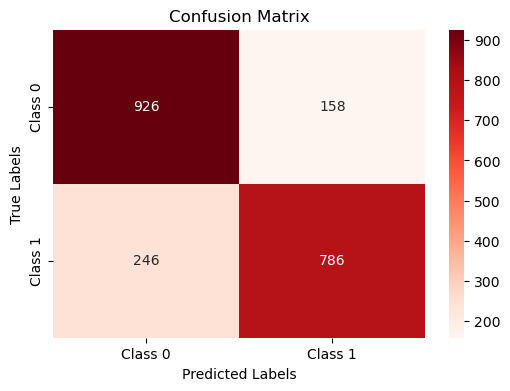

In [25]:
conf_matrix_all = confusion_matrix(y_test_all, predictions_all)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_all, annot=True, fmt='d', cmap='Reds', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

- When we used all the features, the accuracy increased to 81%. Since it did not increase much, we can say that the other 14 features did not have much effect on the label.
- When we used all the features, the accuracy increased to 81%. Since it did not increase much, we can say that the other 14 features do not have much effect on the label. The reason for this is that they are not very related to the label, and we can see this from the correlation matrix.

# 2. Support Vector Machine

- We will train a different model using the SVM algorithm and evaluate the results.

## 2.1 Implementing svm with grid search cv using all features

* Define features and target variable, you will use all features of dataset in this task

In [26]:
# We have X_all, y

* Split the dataset into a training set and a validation set (80% training and 20% validation).

In [27]:
# We have X_train_all, y_train_all, X_test_all, y_test_all 

* Scale the features using StandardScaler

In [28]:
# We have X_train_all, y_train_all, X_test_all, y_test_all 

#### Implement GridSearchCV 

- We will use GridsearchCV to find the best hyperparameters for the model. GridSearchCV tries all combinations and returns the parameter set that gives the highest accuracy.

- The C parameter determines how much the errors will be penalized. If it is high, the margin will be low but the error will be low. If it is low, the opposite will be true.
- The kernel, on the other hand, allows us to separate data more easily by moving data that is not linearly separable to a higher dimension.

In [29]:
parameters = {'C': [0.1, 1, 10],
              'kernel': ['linear', 'rbf', 'poly']}

* Initialize the SVM classifier

In [30]:
svm_model_all = SVC()
grid_search = GridSearchCV(estimator=svm_model_all, param_grid=parameters, cv=5, scoring='accuracy', verbose=3)

* Train the SVM classifier with the best parameters found from grid search


In [31]:
grid_search.fit(X_train_all, y_train_all)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.796 total time=   2.7s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.813 total time=   2.6s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.788 total time=   2.1s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.788 total time=   2.6s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.803 total time=   2.5s
[CV 1/5] END .................C=0.1, kernel=rbf;, score=0.814 total time=   3.5s
[CV 2/5] END .................C=0.1, kernel=rbf;, score=0.817 total time=   3.6s
[CV 3/5] END .................C=0.1, kernel=rbf;, score=0.803 total time=   3.7s
[CV 4/5] END .................C=0.1, kernel=rbf;, score=0.807 total time=   3.5s
[CV 5/5] END .................C=0.1, kernel=rbf;, score=0.815 total time=   3.5s
[CV 1/5] END ................C=0.1, kernel=poly;, score=0.801 total time=   3.0s
[CV 2/5] END ................C=0.1, kernel=poly;,

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy', verbose=3)

- Since the calculation takes a long time when the C value is greater than 10 and especially when tried with the linear kernel, we tried to set C to a maximum of 10.

In [32]:
grid_search.best_params_

{'C': 10, 'kernel': 'rbf'}

- We found that we could get the highest accuracy when we set the C value to 10 and specified the kernel as a radial basis function.

In [33]:
grid_search.best_score_

0.8241544588410911

- We will repeat the search using values of C around 10 to see if there is a slightly more optimal value.

In [34]:
parameters = {'C': [6,8,10,12,14],
              'kernel': ['rbf']}
grid_search = GridSearchCV(estimator=svm_model_all, param_grid=parameters, cv=5, scoring='accuracy', verbose=3)
grid_search.fit(X_train_all, y_train_all)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ...................C=6, kernel=rbf;, score=0.825 total time=   3.7s
[CV 2/5] END ...................C=6, kernel=rbf;, score=0.829 total time=   3.3s
[CV 3/5] END ...................C=6, kernel=rbf;, score=0.825 total time=   3.3s
[CV 4/5] END ...................C=6, kernel=rbf;, score=0.820 total time=   3.3s
[CV 5/5] END ...................C=6, kernel=rbf;, score=0.829 total time=   3.4s
[CV 1/5] END ...................C=8, kernel=rbf;, score=0.826 total time=   3.5s
[CV 2/5] END ...................C=8, kernel=rbf;, score=0.829 total time=   3.5s
[CV 3/5] END ...................C=8, kernel=rbf;, score=0.824 total time=   3.5s
[CV 4/5] END ...................C=8, kernel=rbf;, score=0.822 total time=   3.4s
[CV 5/5] END ...................C=8, kernel=rbf;, score=0.823 total time=   3.7s
[CV 1/5] END ..................C=10, kernel=rbf;, score=0.825 total time=   3.6s
[CV 2/5] END ..................C=10, kernel=rbf;,

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [6, 8, 10, 12, 14], 'kernel': ['rbf']},
             scoring='accuracy', verbose=3)

In [35]:
grid_search.best_params_

{'C': 6, 'kernel': 'rbf'}

In [36]:
grid_search.best_score_

0.8255728985574029

- For the most optimal case, we decide that the C value should be 6 and the kernel should be RBF. In this case, the accuracy value increases to %82.55.

In [37]:
results = pd.DataFrame(grid_search.cv_results_) # Result of other combinations
print(results[['params', 'mean_test_score']])

                       params  mean_test_score
0   {'C': 6, 'kernel': 'rbf'}         0.825573
1   {'C': 8, 'kernel': 'rbf'}         0.824745
2  {'C': 10, 'kernel': 'rbf'}         0.824154
3  {'C': 12, 'kernel': 'rbf'}         0.822027
4  {'C': 14, 'kernel': 'rbf'}         0.820608


* Make predictions on the validation set using the best model


In [38]:
best_model = grid_search.best_estimator_
y_pred_all = best_model.predict(X_test_all)
accuracy_score(y_test_all, y_pred_all)

0.8431001890359168

#### Evaluation of the model's performance, print classification report and confusion matrix and best parameters found from GridSearchCV

In [39]:
report_svm_all = classification_report(y_test_all, y_pred_all, output_dict=True)
report_svm_all_df = pd.DataFrame(report_svm_all).transpose()
display(report_svm_all_df.style.background_gradient(cmap="Blues").set_caption("Classification Report"))

,precision,recall,f1-score,support
0,0.870809,0.814576,0.841754,1084.000000
1,0.817604,0.873062,0.844424,1032.000000
accuracy,0.843100,0.843100,0.843100,0.843100
macro avg,0.844207,0.843819,0.843089,2116.000000
weighted avg,0.844860,0.843100,0.843056,2116.000000


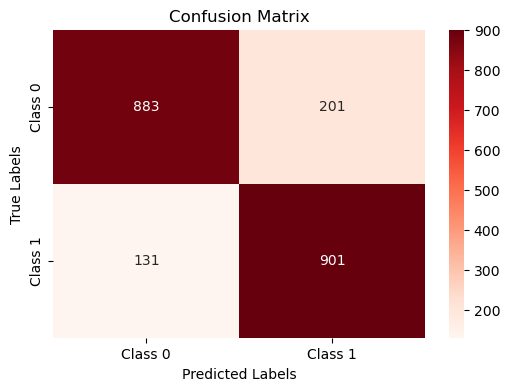

In [40]:
conf_matrix_svm_all = confusion_matrix(y_test_all, y_pred_all)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_svm_all, annot=True, fmt='d', cmap='Reds', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

- When we use the svm model using all the features, we see that the accuracy increases by 3% compared to logistic regression. Although there is no big difference, we can say that svm is a more suitable model for this dataset.

- Importantly, logistic regression had some weakness in predicting positive classes. However, we see that in SVM, both classes were predicted equally accurately.

## 2.2 Implementing svm with most correlated 2 features

#### Choose the two most correlated features with target feature 'y'

In [41]:
# We have X_most_corr

* Split the dataset into a training set and a validation set (80% training and 20% validation).

In [42]:
# We have X_train_most_corr, y_train_most_corr, X_test_most_corr, y_test_most_corr

* Scale the features using StandardScaler

In [43]:
# We have X_train_most_corr, y_train_most_corr

*  Initialize the SVM classifier, assign 'C' and 'kernel' parameters from the best hyperparameters you found from GridSearchCV

In [44]:
best_params = grid_search.best_params_
svm_model_most_corr = SVC(C=best_params['C'], kernel=best_params['kernel'])

* Train the SVM classifier

In [45]:
svm_model_most_corr.fit(X_train_most_corr, y_train_most_corr)

SVC(C=6)

* Make predictions on the validation set

In [46]:
y_pred_most_corr = svm_model_most_corr.predict(X_test_most_corr)

#### Evaluate the model's performance, print classification report and confusion matrix

In [47]:
report_svm_most_corr = classification_report(y_test_most_corr, y_pred_most_corr, output_dict=True)
report_svm_most_corr_df = pd.DataFrame(report_svm_most_corr).transpose()
display(report_svm_most_corr_df.style.background_gradient(cmap="Blues").set_caption("Classification Report"))

,precision,recall,f1-score,support
0,0.762869,0.833948,0.796827,1084.000000
1,0.806660,0.727713,0.765155,1032.000000
accuracy,0.782136,0.782136,0.782136,0.782136
macro avg,0.784764,0.780831,0.780991,2116.000000
weighted avg,0.784226,0.782136,0.781380,2116.000000


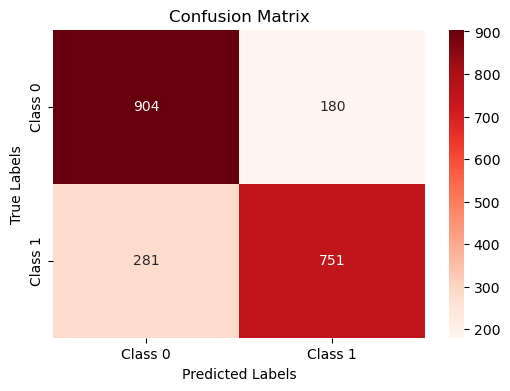

In [48]:
conf_matrix_svm_most_corr = confusion_matrix(y_test_most_corr, y_pred_most_corr)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_svm_most_corr, annot=True, fmt='d', cmap='Reds', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

- When we use the most correlated 2 feature, we see that the accuracy drops to 78%. This is quite normal since we do not benefit from the effect of the other 14 features.

- We see that it has some weakness in predicting positive classes as in logistic regression. There was no such problem when we used all the features.

##### Visualize decision boundary and support vectors

In [ ]:
def plot_svm(X,y,model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 5
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(20, 12))
    
    plt.contourf(xx, yy, Z, levels=[-np.inf, 0], colors='purple', alpha=0.5)
    plt.contourf(xx, yy, Z, levels=[0, np.inf], colors='peachpuff', alpha=0.5)
    
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], 
                s=50, facecolors='g', edgecolors='k', label='Support Vectors')
    plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['-.', '-', '--'], colors='k')
    plt.title('SVM Decision Boundary with Support Vectors')
    plt.legend()
    plt.show()
    
plot_svm(X_test_most_corr, y_test_most_corr, svm_model_most_corr)

- The black line represents the decision boundary. The dashed lines show the margins.

## 2.3 Implementing svm with least correlated 2 features

#### Choose the two least correlated features with target feature 'y'

In [ ]:
X_least_corr = df_bankset[['job', 'month']]
# We have y

- Least correlated features with labels are job (0.02) and month (0.03) features

* Split the dataset into a training set and a validation set (80% training and 20% validation).

In [ ]:
X_train_least_corr, X_test_least_corr,y_train_least_corr, y_test_least_corr = train_test_split(X_least_corr, y, test_size=0.2, random_state=82)

* Scale the features using StandardScaler

In [ ]:
scaler = StandardScaler()
X_train_least_corr = scaler.fit_transform(X_train_least_corr)
X_test_least_corr = scaler.transform(X_test_least_corr)

*  Initialize the SVM classifier, assign 'C' and 'kernel' parameters from the best hyperparameters you found from GridSearchCV

In [ ]:
svm_model_least_corr = SVC(C=best_params['C'], kernel=best_params['kernel'])

* Train the SVM classifier

In [ ]:
svm_model_least_corr.fit(X_train_least_corr, y_train_least_corr)

* Make predictions on the validation set

In [ ]:
y_pred_least_corr = svm_model_least_corr.predict(X_test_least_corr)

#### Evaluate the model's performance, print classification report and confusion matrix

In [ ]:
report_svm_least_corr = classification_report(y_test_least_corr, y_pred_least_corr, output_dict=True)
report_svm_least_corr_df = pd.DataFrame(report_svm_least_corr).transpose()
display(report_svm_least_corr_df.style.background_gradient(cmap="Blues").set_caption("Classification Report"))

In [ ]:
conf_matrix_svm_least_corr = confusion_matrix(y_test_least_corr, y_pred_least_corr)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_svm_least_corr, annot=True, fmt='d', cmap='Reds', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

- We see that when training is done with least correlated features, the accuracy drops to 62%. Since these features are the least meaningful features for the label, their effects are low.

- The problem of not being able to predict positive classes well enough, which we observed except for the SVM (all features) model, is even more pronounced here. This is also the reason why Accuracy has decreased. Because the correct prediction rate of negative classes is almost the same as other models.

##### Visualize decision boundary and support vectors

In [ ]:
plot_svm(X_test_least_corr, y_test_least_corr,svm_model_least_corr)

### After completing the SVM and logistic regression tasks, the best results of the experiments with the SVM and Logistic regression models will be compared in a table.

In [ ]:
result_df = pd.concat([report_all_df, report_svm_all_df], axis=1, ignore_index=False)
result_df

- The best results in both models were obtained when we used all the features. When we compare these two models, we see that the SVM model is slightly better.

# 3. Decision Tree

### Import necessary libraries for Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [ ]:
df_weights_bmi = pd.read_csv("weights_bmi_6classes.csv", encoding="utf-8") # We will use different dataset
df_weights_bmi

- In the dataset, BMI_class represents the label feature. There are 8 features.
- Label can be 6 different classes numbered from 1 to 6.

* Define features and target variable, you will use all features of dataset in this task

In [ ]:
X_dt = df_weights_bmi.iloc[:,1:]
y_dt = df_weights_bmi.iloc[:,0]

* Split the dataset into a training set and a validation set (80% training and 20% validation).

In [ ]:
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, test_size=0.2, random_state=82)

* Initialize the Decision Tree classifier

In [ ]:
dt_model = DecisionTreeClassifier()

* Train the Decision Tree classifier

In [ ]:
dt_model.fit(X_train_dt, y_train_dt)

* Make predictions on the validation set

In [ ]:
y_pred_dt = dt_model.predict(X_test_dt)

accuracy_score(y_test_dt, y_pred_dt)

#### Evaluate the model's performance, print classification report and confusion matrix

In [ ]:
report_dt = classification_report(y_test_dt, y_pred_dt, output_dict=True)
report_dt_df = pd.DataFrame(report_dt).transpose()
display(report_dt_df.style.background_gradient(cmap="Blues").set_caption("Classification Report"))

In [ ]:
conf_matrix_dt = confusion_matrix(y_test_dt, y_pred_dt)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Reds', xticklabels=['0','1','2','3','4','5'], yticklabels=['0','1','2','3','4','5','6'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

#### Visualize the Decision Tree, show clearly class number, gini value etc.


In [ ]:
plt.figure(figsize=(40, 20))
plot_tree(dt_model,max_depth=4, filled=True, feature_names=X_dt.columns, class_names=str(y_dt.unique()), fontsize=11)
plt.show()

### What is the role of gini in decision tree?

- The Gini value measures the purity of the existing data. The closer it is to 0, the simpler it is. The closer it is to 1, the more complex it is. The aim of the DEcision tree is to reach the precision estimate by making divisions that will reduce the Gini index as much as possible.